<a href="https://colab.research.google.com/github/slapazromero/EjercicioKNN_Paris/blob/main/Ejercicios_KNN_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Preproceso.

## Importacion de los datos del dataset.

In [2]:
paris_housing = pd.read_csv('ParisHousing.csv')

## Mostrar las primeras y ultimas filas del dataframe importado.

In [3]:
paris_housing.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [4]:
paris_housing.tail()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708.4


## Modificaciones de los datos.
No se ve ningún dato que sea necesario modificar.

## Mostrar las primeras y ultimas filas del dataframe modificado.

In [5]:
paris_housing.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [6]:
paris_housing.tail()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708.4


## Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [7]:
paris_housing.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


## Mostrar un mapa de calor que indique la correlación entre variables.

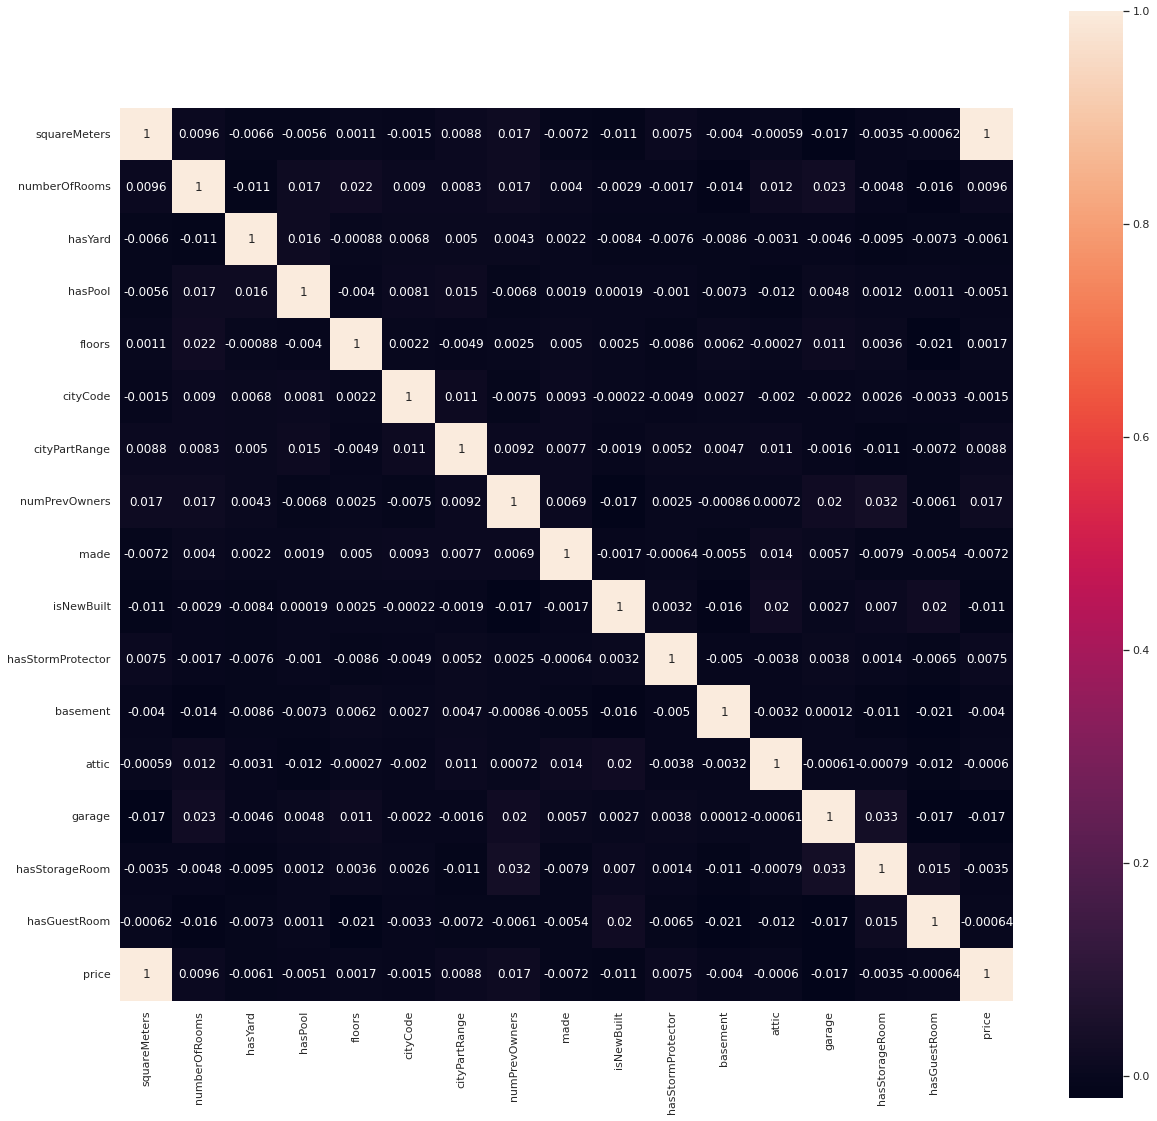

In [8]:
sns.set(rc = {'figure.figsize':(20, 20)})
sns.heatmap(paris_housing.corr(), square=True, annot=True)

## Seleccionar las características a tener en cuenta en el estudio.

In [9]:
caracteristicas = ['squareMeters', 'numPrevOwners', 'isNewBuilt', 'garage']
resultado = ['price']

## Separar datos entre datos de entrada y etiquetas (resultados).

In [10]:
x_paris_housing = paris_housing[caracteristicas]
y_paris_housing = paris_housing[resultado]

## Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_paris_housing, y_paris_housing, test_size=0.25)

# Modelo KNeighborsRegressor

## Optimización de hiperparámetros.

### Validación cruzada.

In [12]:
def validacion_cruzada(index, x_train, y_train, weights):
  kf = KFold(n_splits=5)

  model = KNeighborsRegressor(index, weights=weights)
  scores = []

  for train_fold, test_fold in kf.split(x_train):
    model.fit(x_train.values[train_fold], y_train.values[train_fold].ravel())
    y_predict = model.predict(x_train.values[test_fold])
    scores.append(mean_absolute_error(y_train.values[test_fold], y_predict))
  return np.mean(scores)


In [13]:
resultados = []
for i in range(2):
  for j in range(1, 31):
    if i == 0:
      resultados.append((validacion_cruzada(j, x_train, y_train, 'uniform'), j, 'uniform'))
    elif i == 1:
      resultados.append((validacion_cruzada(j, x_train, y_train, 'distance'), j, 'distance'))

mejor_resultado = min(resultados)
print(mejor_resultado)

(3630.2258074581528, 29, 'distance')


## Entrenamiento y predicción.

### Elegir, instanciar y entrenar el modelo.

In [14]:
model = KNeighborsRegressor(mejor_resultado[1], weights=mejor_resultado[2])

### Realizar una predicción con los datos de prueba.

In [15]:
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=29, weights='distance')

In [16]:
y_predict = model.predict(x_test)

## Evaluación.

### Mostrar el error cuadrático medio

In [17]:
mean_squared_error(y_test, y_predict)

18435716.929226853

### Mostrar el error absoluto medio

In [18]:
mean_absolute_error(y_test, y_predict)

3402.679703661145

###  Representar gráficamente los valores predichos con los valores reales.

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


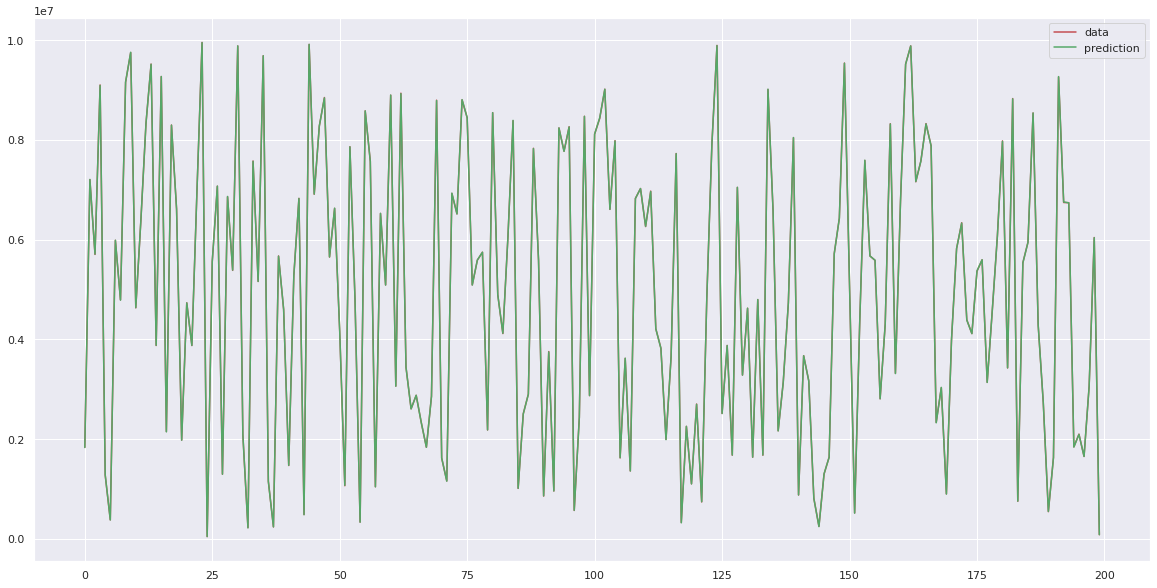

In [19]:
plt.figure(figsize=(20,10))
xx = np.stack(i for i in range(200))
plt.plot(xx, y_test[:200], c='r', label='data')
plt.plot(xx, y_predict[:200], c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


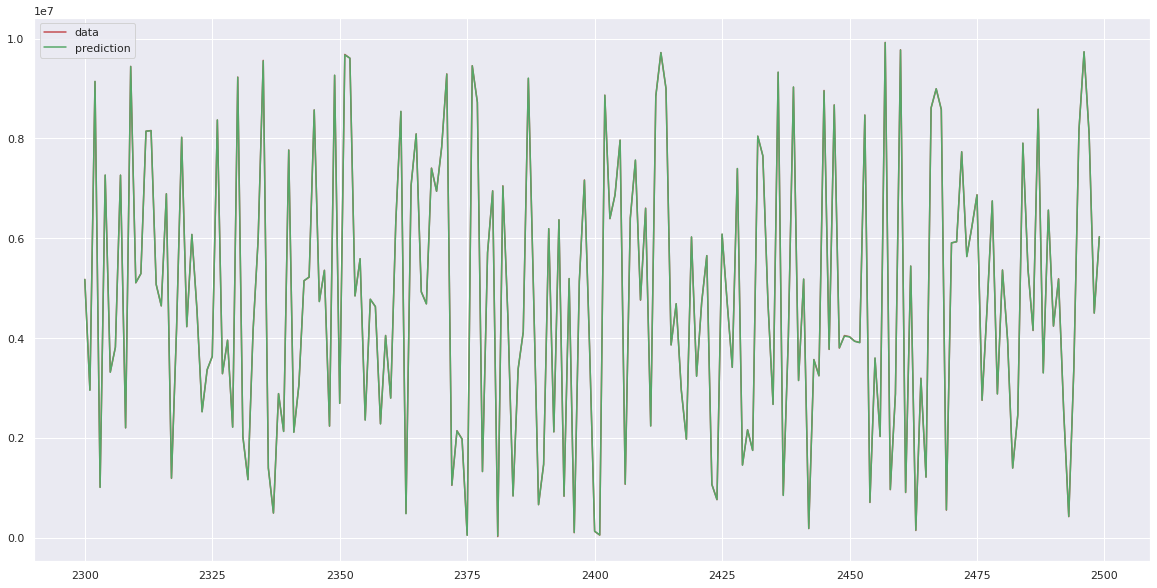

In [20]:
start = 2300
plt.figure(figsize=(20,10))
xx = np.stack(i for i in range(start, y_test.shape[0]))
plt.plot(xx, y_test[start:], c='r', label='data')
plt.plot(xx, y_predict[start:], c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.show()
